In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

from skimage.feature import graycoprops, graycomatrix


ImportError: cannot import name 'greycoprops' from 'skimage.feature' (c:\Users\jacob\anaconda3\envs\cogs118a\Lib\site-packages\skimage\feature\__init__.py)

In [32]:
def load_images(dir_name):

    img_list = []

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

    for item in os.listdir(dir_name):

        img_path = os.path.join(dir_name, item)
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        img = cv2.GaussianBlur(img, (5,5), 1)

        img = clahe.apply(img)
        
        img_list.append(img)

    
    return img_list

def img_to_array(img):
    
    
    img = np.asarray(img)
    return img
  
def find_edges(img):

    v = np.median(img)
    sigma = 0.33

    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(max(0, (1.0 + sigma) * v))

    img = cv2.Canny(img, lower, upper)
    return img


In [ ]:
test = 'train'



image_list = load_images("./train/Hairline Fracture")
#print(image_list[0])


[[19 19 19 ... 32 32 32]
 [19 19 19 ... 32 32 32]
 [19 19 19 ... 32 32 32]
 ...
 [22 22 22 ... 36 36 36]
 [22 22 22 ... 36 36 36]
 [22 22 22 ... 36 36 36]]


<function matplotlib.pyplot.show(close=None, block=None)>

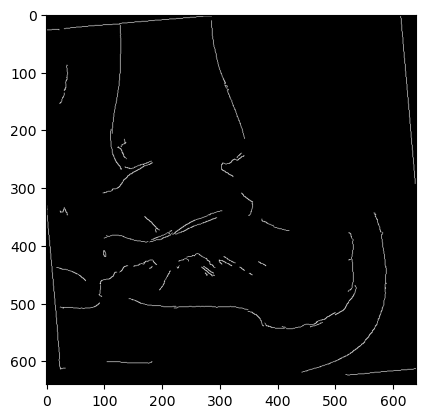

In [38]:

for i, img in enumerate(image_list):
    img = find_edges(img)
    image_list[i] = img


plt.imshow(image_list[0], cmap='gray')
#plt.imshow(img_arr[30])
plt.show

In [81]:
offsets = [[1,0], [0,1], [-1,0], [0,-1]]

feature_list = []

distances = [1,3,5,9]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2]

properties = ['energy', 'correlation', 'dissimilarity', 'homogeneity', 'contrast']

# need to add more distances (1,3,5,9)
for n, img in enumerate(image_list):
    glcm = graycomatrix(img, distances, angles , levels=256, normed=True)
    feature_row = {}

    for prop in properties:
        prop_values = graycoprops(glcm, prop)   
        for i, dist in enumerate(distances):
            for j, angle in enumerate(angles): 
                feature_name = f"{prop}_d{dist}_a{int(np.degrees(angle))}"
                feature_row[feature_name] = prop_values[i, j]

    feature_list.append(feature_row)

In [82]:
df = pd.DataFrame(feature_list)
df.head()

,energy_d1_a0,energy_d1_a45,energy_d1_a90,energy_d1_a135,energy_d1_a180,energy_d1_a225,energy_d1_a270,energy_d3_a0,energy_d3_a45,energy_d3_a90,...,contrast_d5_a180,contrast_d5_a225,contrast_d5_a270,contrast_d9_a0,contrast_d9_a45,contrast_d9_a90,contrast_d9_a135,contrast_d9_a180,contrast_d9_a225,contrast_d9_a270
0,0.983420,0.980541,0.983383,0.980873,0.983420,0.980541,0.983383,0.980668,0.979600,0.980974,...,1211.218627,1314.820109,1164.977916,1262.693270,1342.702933,1274.286475,1339.143961,1262.693270,1342.702933,1274.286475
1,0.989056,0.987409,0.989115,0.987430,0.989056,0.987409,0.989115,0.987181,0.986796,0.987374,...,844.172982,858.434941,818.252584,878.346313,869.197935,868.846325,874.698163,878.346313,869.197935,868.846325
2,0.972522,0.968277,0.970988,0.967678,0.972522,0.968277,0.970988,0.967389,0.966456,0.967175,...,1979.870448,2114.418499,2022.111097,2117.048088,2177.120008,2153.759905,2194.914866,2117.048088,2177.120008,2153.759905
3,0.965982,0.963231,0.972243,0.966518,0.965982,0.963231,0.972243,0.962175,0.962006,0.965151,...,2395.076833,2406.993703,2254.754675,2492.056074,2472.352882,2400.437550,2391.143620,2492.056074,2472.352882,2400.437550
4,0.928179,0.926681,0.941658,0.926640,0.928179,0.926681,0.941658,0.922228,0.922781,0.929074,...,4704.552350,4793.089178,4182.784326,4886.697021,4847.804673,4446.477256,4811.567871,4886.697021,4847.804673,4446.477256


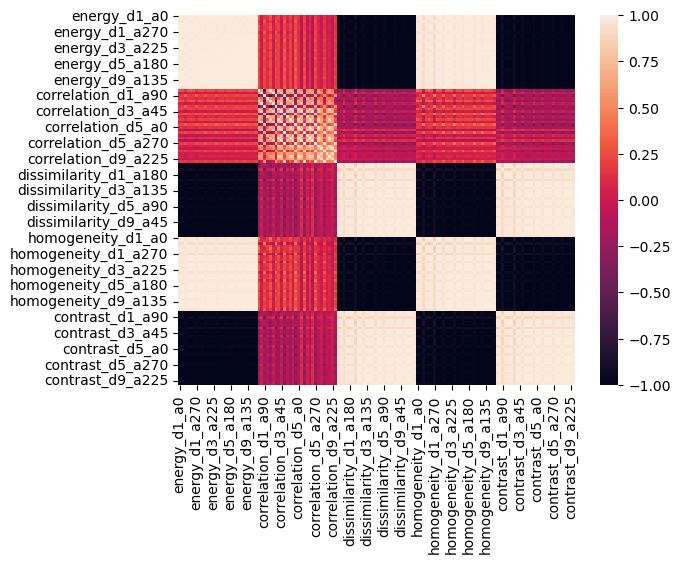

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()